<a href="https://colab.research.google.com/github/zcry332/Neural_Network/blob/main/NN_BankingProject_G3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
import sklearn.preprocessing

dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv'
df = pd.read_csv(dataset_url)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()
df.shape
print(f"\n Total transactions: {len(df)}")
print(f"\n Features: {df.shape[1]-1}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()
print(f"Descriptive statistics{df.describe()}")

Descriptive statistics                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00 

In [ ]:
# Missing value check
df.isnull().sum().max()
# Duplicated values check
num_duplicates = df.duplicated().sum()
print(f"Number of duplicated: {num_duplicates}")

df[df.duplicated()].head()

Number of duplicated: 1081


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0


In [ ]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

Class
0    283253
1       473
Name: count, dtype: int64


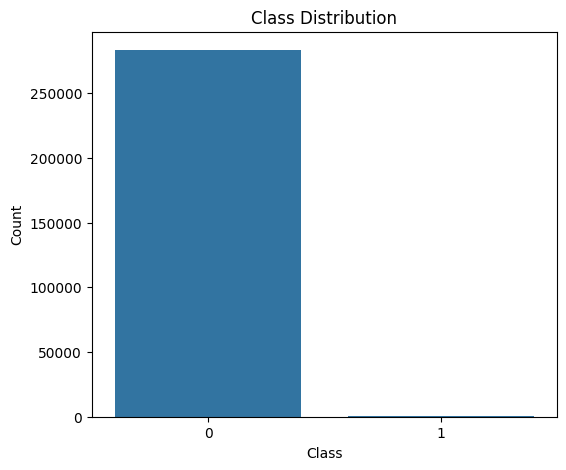

In [ ]:
class_counts = df['Class'].value_counts()
print(class_counts)

# Visualize the class distribution, how many samples of each class, check the data balance.
plt.figure(figsize=(6, 5))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

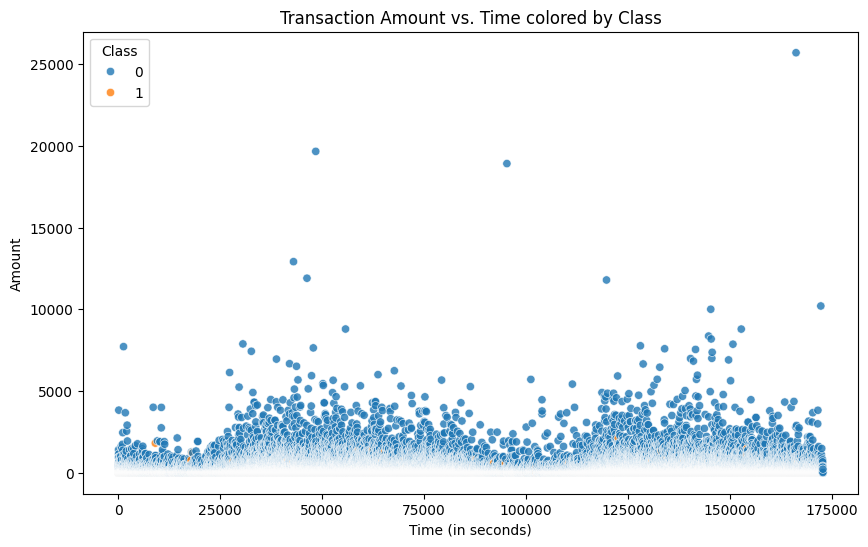

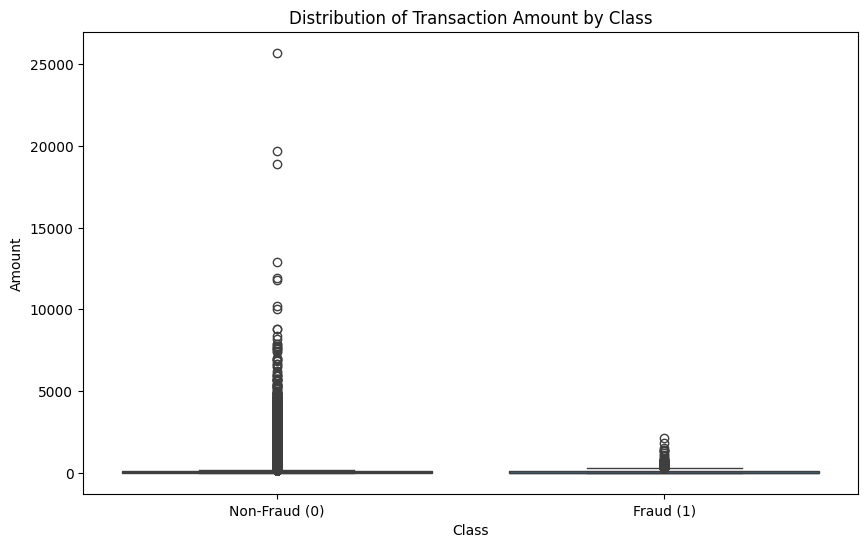

In [ ]:
# spot outliers using time and amount, analyze relationship between 'Time', 'Amount', and 'Class'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df, alpha=0.8)
plt.title('Transaction Amount vs. Time colored by Class')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')
plt.show()

# Analyze the distribution of 'Amount' for each class, boxplot shows the relationship between class and amount.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Distribution of Transaction Amount by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

In [ ]:
correlation_matrixA= df.corr()

# Get correlations with the 'Class' column and sort them
class_correlations = correlation_matrixA['Class'].sort_values(ascending=False)
# Print the sorted correlations
print("Correlation of features with Class:")
print(class_correlations)


# Explore correlations between 'V' features and 'Class'
# Due to the large number of V features, let's look at the correlation matrix for a subset or focus on features with higher variance
v_features = [f'V{i}' for i in range(1, 29)]
correlation_matrixB = df[v_features + ['Class']].corr()

# Display correlations with 'Class'
print("\nCorrelation of V features with Class:")
print(correlation_matrixB['Class'].sort_values(ascending=False))

Correlation of features with Class:
Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64

Correlation of V features with Class:
Class    1.000000
V11      0.149067
V4       0.129326
V2       0.084624
V19      0.033631
V8       0.033068
V21      0.026357
V27      0.021892
V20      0.021486
V28      0.009682
V22      0.004887
V26      0.004265
V25      0.003202
V15     -0.003300
V13     -0.003897
V23     -0.006333
V24     -0.007210
V6

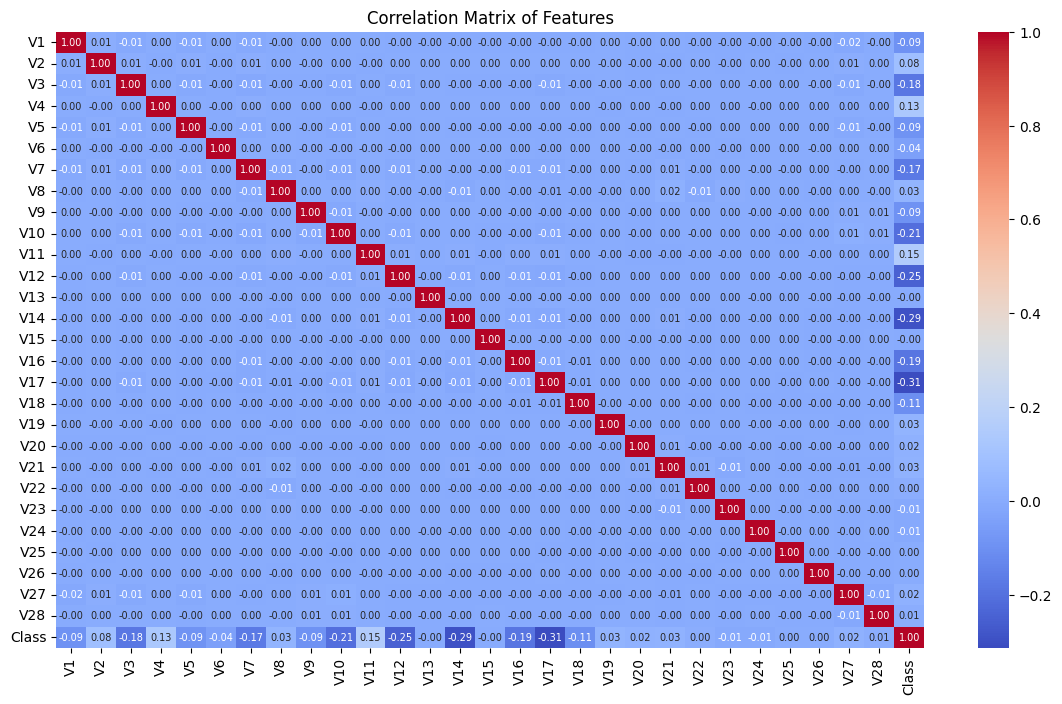

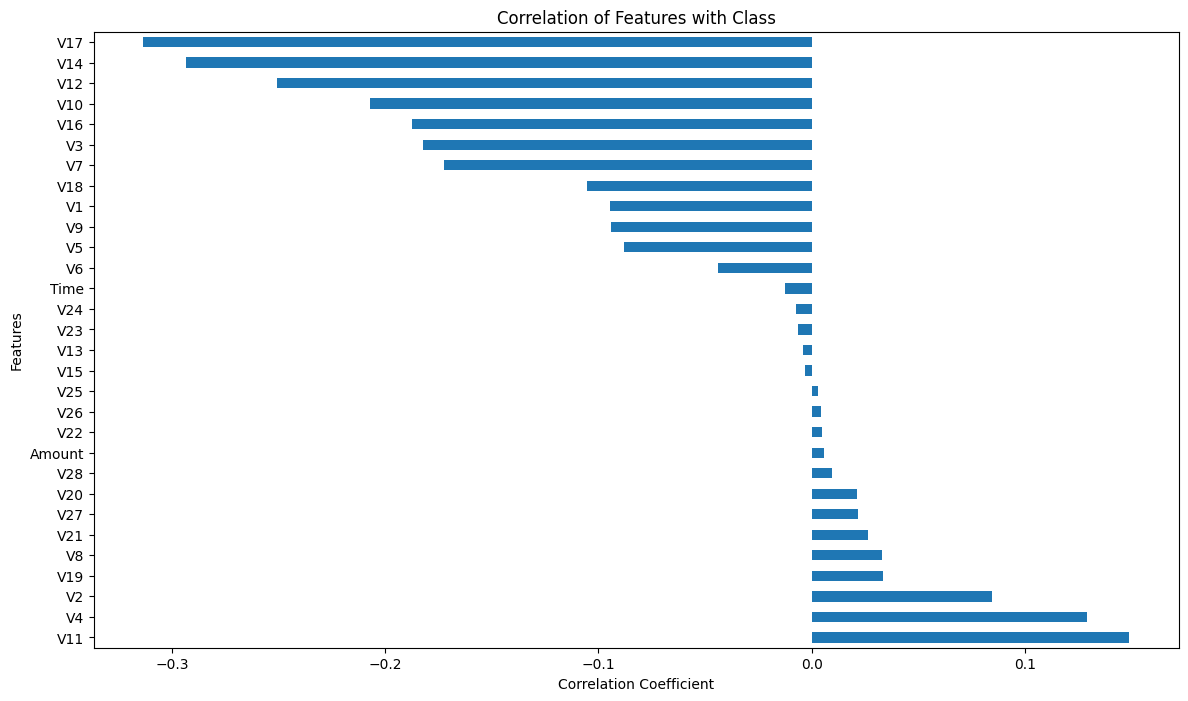

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(
    correlation_matrixB,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    annot_kws={'size':7}
    )
plt.title('Correlation Matrix of Features')
plt.show()

plt.figure(figsize=(14, 8))
class_correlations.drop('Class').plot(kind='barh')
plt.title('Correlation of Features with Class')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [ ]:
# detect outliers using isolation forest with amount and time columns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

features = ['Amount', 'Time','V17', 'V14', 'V12', 'V10', 'V11', 'V16', 'V4', 'V7', 'V3']
df_subset = df[features]

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_subset)

# Initialize and fit the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.002, random_state=42, n_jobs=-1) # set up expected proportion of outliers in the dataset based on the actual fraud rate
predictions = iso_forest.fit_predict(df_scaled)

# Identify outliers (predicted as -1)
outliers_isoforest = df_subset[predictions == -1]

print(f"Number of outliers detected by Isolation Forest: {len(outliers_isoforest)}")
print("\nFirst 5 outliers:")
print(outliers_isoforest.head())

Number of outliers detected by Isolation Forest: 568

First 5 outliers:
       Amount    Time        V17       V14        V12        V10       V11  \
1632  7712.43  1264.0  -1.654892 -1.652836  -1.843056  -2.636622  3.702177   
4895     0.77  4429.0  -2.648779 -4.632961  -3.393634  11.936393  4.354865   
5425   553.60  5406.0  -0.777258 -4.496585  -3.717391   6.764860  3.553336   
6108    59.00  6986.0 -12.598419 -6.771097 -10.912819  -4.801637  4.895844   
6329     1.00  7519.0   6.739384 -6.079337  -4.609628  -2.447469  2.101344   

           V16        V4         V7         V3  
1632  4.087802  6.013346  34.303177 -12.389545  
4895 -1.396627 -3.470182   4.163343   1.999942  
5425 -1.143550  3.930311   5.400286   2.253879  
6108 -7.358083  2.679787  -3.496197  -2.592844  
6329  2.581851  4.732795   1.713445  -4.304597  


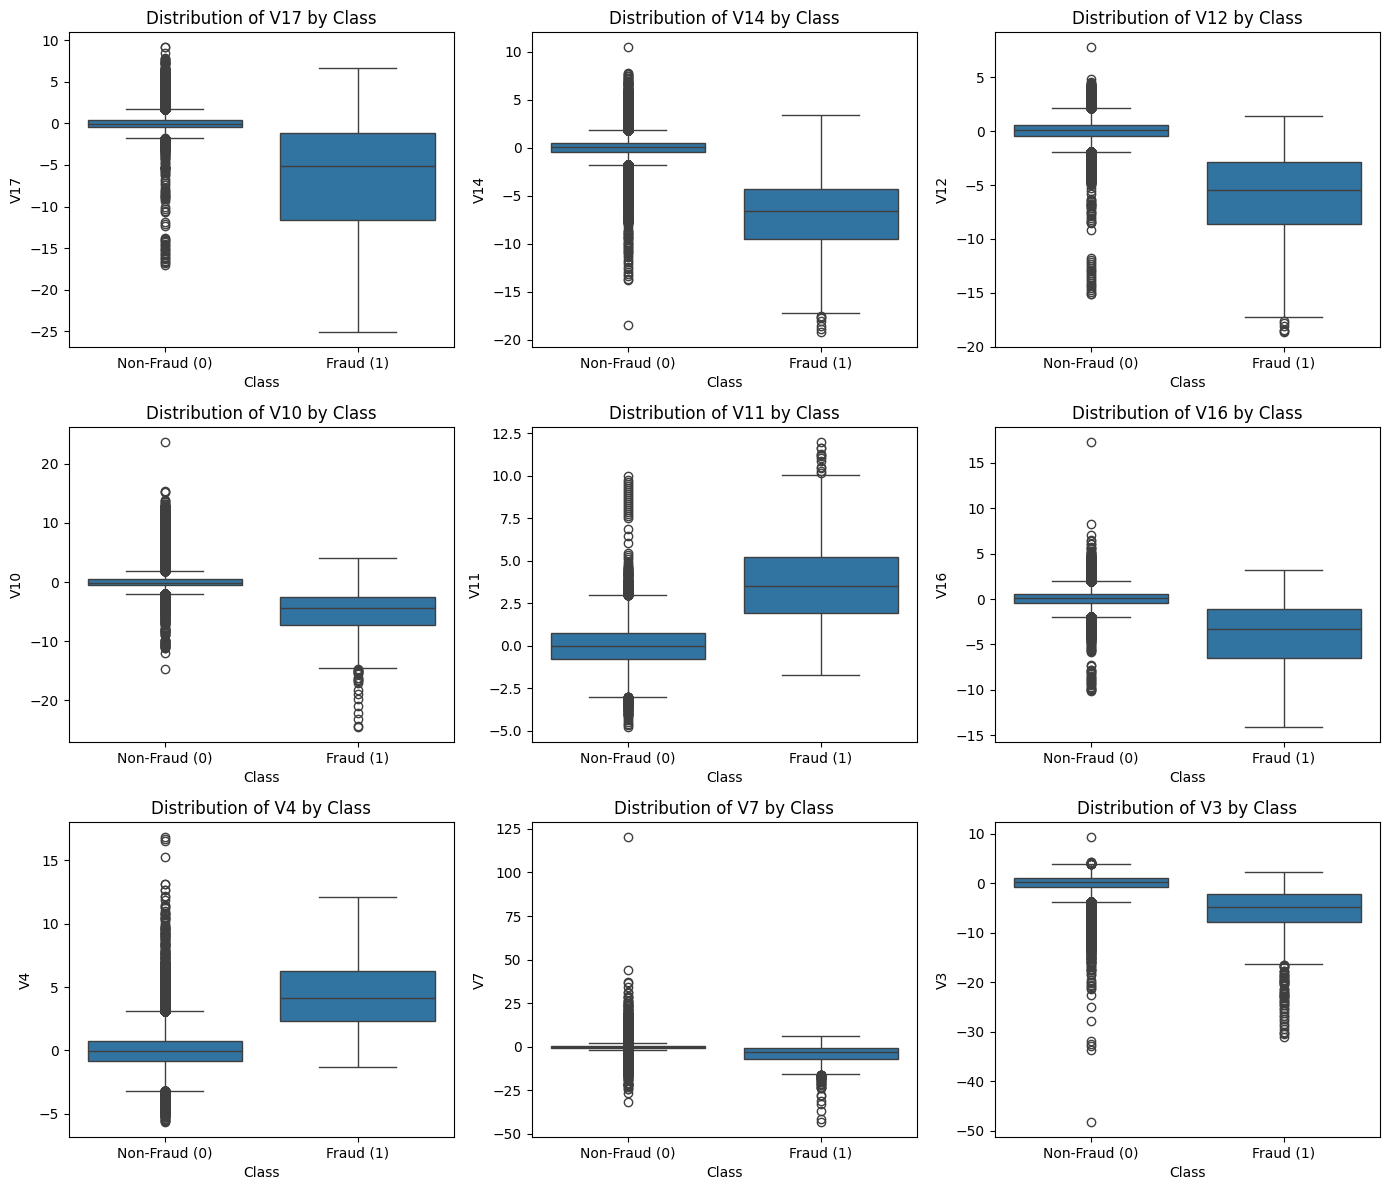

In [ ]:
# after finding out that v17, v14, v12, v10, v11, v16, v4, v3, and v7 have significant impact on class
selected_v_features = ['V17', 'V14', 'V12', 'V10', 'V11', 'V16', 'V4', 'V7', 'V3']

plt.figure(figsize=(14, 12))
for i, feature in enumerate(selected_v_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel('Class')
    plt.ylabel(feature)
    plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])

plt.tight_layout()
plt.show()


# EDA completed

In [ ]:
# Separate features X and target y
y = df['Class']
X = df.drop('Class', axis=1)

print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

# train/test split, since the output of this model is binary, use STRATIFY to prevent bias
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Shape of features (X): (283726, 30)
Shape of target (y): (283726,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
# Use class_weight='balanced' to handle the imbalanced dataset
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)

# Train the model
model.fit(X_train, y_train)

# Extract feature importances
feature_importances = model.feature_importances_

# Create a Series for easy analysis and visualization
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sort features by importance in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Print the sorted feature importance scores
print("Feature Importance Scores (Random Forest):")
print(sorted_feature_importances)

Feature Importance Scores (Random Forest):
V14       0.185744
V10       0.120414
V12       0.100224
V17       0.093938
V4        0.093173
V3        0.059786
V16       0.056195
V11       0.053734
V2        0.035560
V9        0.025835
V7        0.017054
V19       0.015439
V21       0.014797
V18       0.011844
V8        0.011361
V27       0.010898
V1        0.010286
V13       0.008713
V20       0.008622
V5        0.008512
V6        0.007835
Amount    0.007380
V26       0.006779
V15       0.006762
V25       0.005223
V24       0.005152
V22       0.005038
V23       0.005027
V28       0.004896
Time      0.003778
dtype: float64
